In [1]:
setwd('/import/DB/zhang//data')

In [2]:
library(Seurat)
sce.all=readRDS( "scRNA.rename.rds")

Warning message:
"package 'Seurat' was built under R version 4.2.3"
The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject



In [3]:
table(sce.all$celltype)


                    B                  Endo                  Mast 
                 6364                  3952                   541 
Mesenchyme/osteoclast               Myeloid           Neutrophils 
                25773                 14538                  8099 
                 T/NK 
                28230 

In [5]:
sce.all$celltype = gsub('Mesenchyme/osteoclast','Mesenchyme_osteoclast',sce.all$celltype)

In [6]:
sce.all$celltype = gsub('T/NK','T_NK',sce.all$celltype)

In [7]:

sce.all.list <- SplitObject(sce.all , split.by = "celltype")
sce.all.list

for (i in names(sce.all.list)) {
  epi_mat = sce.all.list[[i]]@assays$RNA@counts
  epi_phe = sce.all.list[[i]]@meta.data
  sce=CreateSeuratObject(counts = epi_mat, 
                         meta.data = epi_phe )
  sce
  table(sce@meta.data$orig.ident) 
  save(sce,file = paste0(i,'.Rdata'))
}

$Mesenchyme_osteoclast
An object of class Seurat 
38629 features across 25773 samples within 1 assay 
Active assay: RNA (38629 features, 2000 variable features)
 3 dimensional reductions calculated: pca, harmony, umap

$Myeloid
An object of class Seurat 
38629 features across 14538 samples within 1 assay 
Active assay: RNA (38629 features, 2000 variable features)
 3 dimensional reductions calculated: pca, harmony, umap

$T_NK
An object of class Seurat 
38629 features across 28230 samples within 1 assay 
Active assay: RNA (38629 features, 2000 variable features)
 3 dimensional reductions calculated: pca, harmony, umap

$Mast
An object of class Seurat 
38629 features across 541 samples within 1 assay 
Active assay: RNA (38629 features, 2000 variable features)
 3 dimensional reductions calculated: pca, harmony, umap

$B
An object of class Seurat 
38629 features across 6364 samples within 1 assay 
Active assay: RNA (38629 features, 2000 variable features)
 3 dimensional reductions calculat

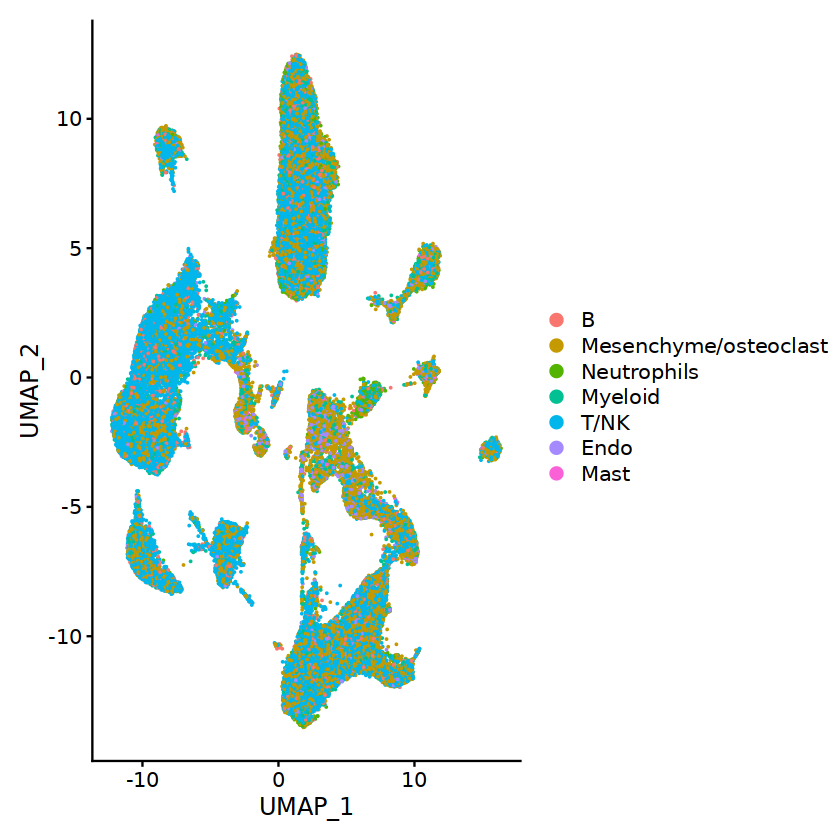

In [4]:
DimPlot(sce.all)

In [5]:
Idents(sce.all) = 'celltype'

In [6]:
table(sce.all$celltype)


                    B                  Endo                  Mast 
                 6364                  3952                   541 
Mesenchyme/osteoclast               Myeloid           Neutrophils 
                25773                 14538                  8099 
                 T/NK 
                28230 

In [9]:
mono =subset(sce.all,idents = 'B')

In [11]:
table(mono$celltype)


                    B                  Endo                  Mast 
                  468                   310                    52 
Mesenchyme/osteoclast               Myeloid           Neutrophils 
                 2278                  1032                    58 
                 T/NK 
                 2166 